# Projet 2 : Social Network Analysis with Python

## Première partie

### Q1 :

Représentation sous forme de listes pour les deux réseaux sociaux :

In [88]:
reseauA = [5,[ [0,2],[0,1],[0,3],[1,2],[2,3] ]]

In [89]:
reseauB = [5, [ [0,1],[1,2],[2,4],[4,3],[3,1] ]]

### Q2 :

In [90]:
def creerReseauVide(n):
    return [n, []]

In [91]:
r = creerReseauVide(5)

### Q3 :

In [92]:
def estUnLienEntre(paire,i,j):
    return (i in paire) and (j in paire)

In [93]:
estUnLienEntre([1,0],0,1)

True

### Q4 :

In [94]:
def sontAmis(reseau,i,j):
    return ( ([i,j] in reseau[1]) or [j,i] in reseau[1])

In [95]:
sontAmis(reseauB,3,4)

True

Soit m la taille de reseau[1]

La complexité de cette fonction : 2m + 1 = O(m)

### Q5 :

In [96]:
def declareAmis(reseau,i,j):
    if (not sontAmis(reseau,i,j) ):
        reseau[1].append([i,j])

In [97]:
sontAmis(reseauB,3,5)

False

In [98]:
declareAmis(reseauB,3,5)
sontAmis(reseauB,3,5)

True

Soit m la taille de reseau[1]

    if (not sontAmis(reseau,i,j) ):  2m+1
        reseau[1].append([i,j])      2

La complexité de cette fonction : 2m + 3 = O(m)

### Q6 : 

In [99]:
def listeDesAmisDe(reseau,i):
    l=[]
    for r in reseau[1]:
        if (i == r[0]):
            l.append(r[1])
        elif (i == r[1]):
            l.append(r[0])
    return l

In [100]:
listeDesAmisDe(reseauB,1)

[0, 2, 3]

Soit m la taille de reseau[1]

    for r in reseau[1]:      1
        if (i == r[0]):      2m
            l.append(r[1])
        elif (i == r[1]):    2m
            l.append(r[0])   2m
    return l                 1

La complexité de cette fonction : 6m + 2 = O(m)


### Q7 :

parentA : [6,1,1,3,4,5,1,5,5,7]

parentB : [3,9,0,3,9,4,4,7,1,9]

### Q8 : 

In [101]:
def creerPartitionEnSingletons(n):
    return [i for i in range(n)]

In [102]:
creerPartitionEnSingletons(5)

[0, 1, 2, 3, 4]

### Q9: 

In [103]:
def representant(parent,i):
    try:
        parent[i]
    except IndexError:
        return "error"
    x = i
    while (True):
        if parent[x] != x:
            x = parent[x]
        else:
            return x

In [104]:
parent = [6,9,3,3,3,5,5,5,1,9,10,1,4,9,11,9]

In [105]:
representant(parent,14)

9

Le pire des cas est quand i est le derniere element du groupe et que le tableau contient un seul groupe ; 

    try:
        parent[i]          1
    except IndexError:
        return "error"
    x = i                  1
    while (True):
        if parent[x] != x: 2n-1
            x = parent[x]  2n-1
        else:
            return x       1
        
La complexité de cette foncion est 4n + 1 = O(n)

### Q10 : 

In [106]:
def fusion(parent,i,j):
    p = representant(parent,i)
    q = representant(parent,j)
    parent[p] = q

In [107]:
fusion(parent,6,1)
representant(parent,6)

9

### Q11 : 

### Q12 : 

In [108]:
def representant_v2(parent,i):
    try:
        parent[i]
    except IndexError:
        return "error"
    x = i
    l=[]
    while (True):
        if parent[x] != x:
            l.append(x)
            x = parent[x]
        else:
            for e in l:
                parent[e] = x
            return x

In [109]:
representant_v2(parent,0)

9

In [110]:
representant(parent,0)

9

### Q13 :

In [111]:
def listeDesGroupes(parent):
    p = parent.copy()
    for i in range(len(p)):
        representant(p,i)   
    unique = list(set(p))
    l=[]
    for u in unique:
        z = []
        for i in range(len(parent)):
            if (u == p[i]):
                z.append(i)
        l.append(z)
    return l

In [112]:
parent

[9, 9, 3, 3, 3, 9, 9, 5, 1, 9, 10, 1, 4, 9, 11, 9]

In [113]:
listeDesGroupes(parent)

[[8, 11], [2, 3, 4], [12], [7], [0, 1, 5, 6, 9, 13, 15], [10], [14]]

In [114]:
listeDesGroupes(parent)

[[8, 11], [2, 3, 4], [12], [7], [0, 1, 5, 6, 9, 13, 15], [10], [14]]

### Q14 :

In [115]:
import random
def coupeMinimumRandomisee(reseau):
    P = creerPartitionEnSingletons(reseau[0])
    c = 1
    while (len(listeDesGroupes(P)) >= 3  and (len(reseau[1]) != c)):
        i = random.randint(0,len(reseau[1])-c)
        l = reseau[1][i]
        if( representant_v2(i=l[0],parent=P) != representant_v2(i=l[1],parent=P) ):
            fusion(P,l[0],l[1])
        reseau[1].remove(l)
        reseau[1].append(l)
        c = c +1
        
    for c in range(len(reseau[1])): 
        j = 0
        while (len(listeDesGroupes(P)) >= 3 ):
            if( representant_v2(i=c,parent=P) != representant_v2(i=j,parent=P) ):
                fusion(P,i,j)
            j = j+1
    
    return P

In [126]:
lg = listeDesGroupes(coupeMinimumRandomisee(reseauA))
lg

[[0, 1, 2, 3], [4]]

### Q15 :

In [129]:
def tailleCoupe(reseau, parent):
    c = 0
    lg = listeDesGroupes(coupeMinimumRandomisee(reseau))
    for i in lg[0]:
        for j in lg[1]:
            if( representant_v2(i,parent) == representant_v2(j,parent) ):
                c = c+1

## Deuxième partie : 

Les données ont été extraites dans le fichier "twitter_data.ipynb"

### FIRST DATA : 

Première data sur #JamalKashoggi de 2018-10-17 à 2018-10-19 : 

à peu près 18 000 lignes de tweet/retweet

In [92]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from networkx.algorithms import community
import numpy as np
from geotext import GeoText
from wordcloud import WordCloud

In [93]:
data = pd.read_csv("JamalKashoggi2.csv")

In [94]:
data = data.drop_duplicates("tweet_id")

In [95]:
data.shape

(18001, 10)

In [96]:
data_s = data[data["retweeted_status"] != 0]

In [97]:
data_s = data_s.sort_values("created_at",ascending=True)

In [98]:
data_s["polarity"] = [TextBlob(x).sentiment.polarity for x in data_s["text"]]
data_s["subjectivity"] = [TextBlob(x).sentiment.subjectivity for x in data_s["text"]]

In [16]:
"""data_s3 = data_s.copy()
data_s3 = data_s3.sort_values(by="created_at")
data_s3["order"] = [str(i)+",18000" for i in range(2000,2000+len(data_s3))]
data_s3["retweeted_status"] = data_s3["retweeted_status"].astype(str)
data_s3["tweet_id"] = data_s3["tweet_id"].astype(str)
data_s3.to_excel("JamalKashoggi2_forgephi.xlsx",index=False)"""

'data_s3 = data_s.copy()\ndata_s3 = data_s3.sort_values(by="created_at")\ndata_s3["order"] = [str(i)+",18000" for i in range(2000,2000+len(data_s3))]\ndata_s3["retweeted_status"] = data_s3["retweeted_status"].astype(str)\ndata_s3["tweet_id"] = data_s3["tweet_id"].astype(str)\ndata_s3.to_excel("JamalKashoggi2_forgephi.xlsx",index=False)'

In [17]:
data_s.iloc[2:].head()

tweet_id           created_at              userlocation  \
91985  1052672131732004864  2018-10-17 21:26:08           الحدود الشمالية   
91984  1052672220793847814  2018-10-17 21:26:29                       NaN   
91983  1052672251533901828  2018-10-17 21:26:37                       NaN   
91982  1052672297407004672  2018-10-17 21:26:48                       NaN   
91981  1052672334237184000  2018-10-17 21:26:56  المملكة العربية السعودية   

                  username                                               text  \
91985      م . بدر الرويان  RT @saudiyoutuber: Dear @washingtonpost you fo...   
91984              Timeout  RT @AAwqteAA: ⚡️ FAKE NEWS scandal?!!\r\r\nPro...   
91983           حسين الحمد  RT @saudiyoutuber: Dear @washingtonpost you fo...   
91982       الحياة كلمة 🇸🇦  RT @Abo_Mila1: جمال خاشقجي على قناة الجزيرة يب...   
91981  Ibrahim ALmesfer ,,  RT @saudiyoutuber: Dear @washingtonpost you fo...   

       favorite_count   retweet_count     retweeted_status  \
91985                0           1925  1052630699059105792   
91984                0              1  1052653175067557898   
91983                0           1925  1052630699059105792   
91982                0            146  1052650967781408768   
91981                0           1925  1052630699059105792   

                  user_id language  polarity  subjectivity  
91985           550339938       en  0.000000          0.00  
91984          2950737402       en -0.440625          0.55  
91983           725556690       en  0.000000          0.00  
91982  916667460144762881       ar  0.000000          0.00  
91981           295021214       en  0.000000          0.00

In [100]:
h = nx.DiGraph()
l = []
color_map = []
for d in data_s.iloc[:8000].values:  
    if (d[10] < -0.1):
        color_map.append("#ff4c4c")
    elif (d[10] > 0.1):
        color_map.append("#659D32")
    else:
        color_map.append("#99CCFF")
    l.append((d[7],d[0]))

In [19]:
len(l)

8000

In [101]:
#    'node_size': 10,
#    'node_color': "#99CCFF",
h.add_edges_from(l)
#pos=nx.spring_layout(h)
options = {
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
} 

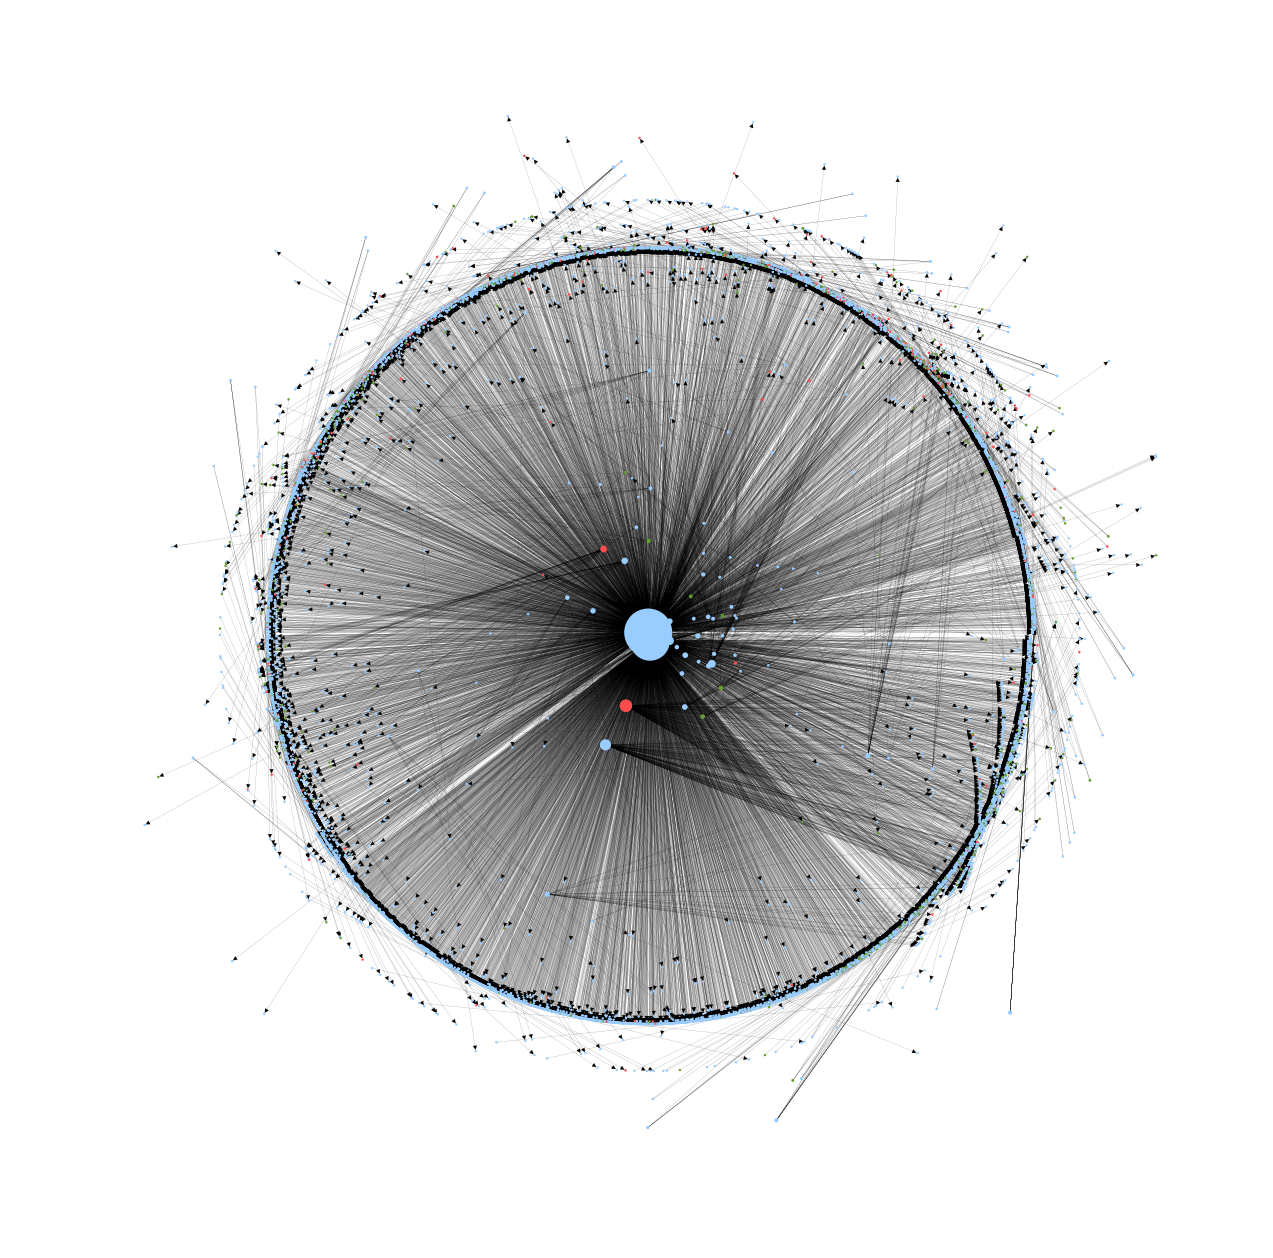

In [12]:
plt.figure(figsize=(17,17)) 
nx.draw_kamada_kawai(h,**options,node_color=color_map,
                     node_size=[v[1]+5 for v in nx.degree(h)])
#nx.draw_spring(h,**options)
#plt.show()

plt.savefig("graph_f1.png", dpi=1000)
plt.savefig("graph_f1.pdf") 

- La taille des noeuds est relative a leurs nombres de retweets
- La couleur du noeud indique s'il est neutre (bleu) , positif (vert) ou négatif (rouge)

In [21]:
print(nx.info(h))

Name: 
Type: DiGraph
Number of nodes: 8302
Number of edges: 8000
Average in degree:   0.9636
Average out degree:   0.9636


In [102]:
c1 = [v[0] for v in nx.degree(h)]
c2 = [v[1] for v in nx.degree(h)]
df = pd.DataFrame({"id_tweet":c1,"value":c2})
df.sort_values(by="value",ascending=False).join(data_s, lsuffix='key', rsuffix='tweet_id')[["key","username","value"]]

KeyError: "['key'] not in index"

#### Density : 

In [22]:
nx.density(h)

0.00011608519736413469

#### Comparaison du nombres des tweets Neutre , Negatif et Positifs : 

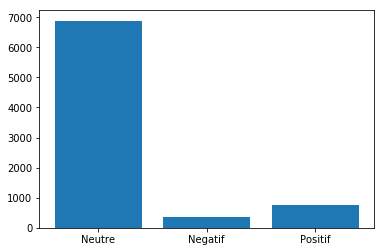

In [48]:
plt.bar(["Neutre","Negatif","Positif"],[color_map.count("#99CCFF"),color_map.count("#ff4c4c"),color_map.count("#659D32")])
plt.savefig("plot_f1.png")

#### Betweenness centrality : 

In [24]:
bc = nx.betweenness_centrality(h)

In [35]:
key = [key for key, value in bc.items() ]
value = [value for key, value in bc.items() ]
bc_data = pd.DataFrame({"key":key,"value":value})
data_s.join
bc_data.join(data_s, lsuffix='key', rsuffix='tweet_id')[["key","username","value"]].iloc[6:10]

key           username  value
6  1052672220793847814        Cheryl 🇺🇸 ❌    0.0
7  1052672251533901828  Maria Skulltaggio    0.0
8  1052672297407004672                Ali    0.0
9  1052672334237184000     Donovan Fraser    0.0

#### In and out degrees : 

In [18]:
in_d = h.in_degree()

In [51]:
out_d = h.out_degree()
[[key,value] for key, value in out_d ][:5]
key = [key for key, value in out_d ]
value = [value for key, value in out_d ]
out_data = pd.DataFrame({"key":key,"value":value})

username  value  \
345                                         Adel   2306   
5003                                         NaN   1566   
5954                                         NaN    648   
0     susan talpas. #MAGA #FIREMUELLER #WALKAWAY    617   
1484                             Four(🍁) Seasons    240   
986                                   JM Álvarez    237   
26                                           NaN    197   
946                                   خالد الحمد    190   
1289                                   Rommy Rsy    167   
7182                              Pawan K Sharma    154   

                                                   text  polarity  
345   RT @Khalid_Tashkndi: 🎥 زلة لسان تفضح محررة «وا...     0.000  
5003                                                NaN       NaN  
5954                                                NaN       NaN  
0     RT @potkazar: The media publicity #JamalKashog...     0.200  
1484  RT @kho12ao: جمال خاشقجي بنفسه يقول السعودية ل...     0.000  
986   RT @beatriz_er: #JamalKashoggi elogiando a ISI...     0.000  
26                                                  NaN       NaN  
946   RT @Alsoqour: To @cnn @BBC @FoxNews @business ...     0.000  
1289  RT @sarahleah1: #Indonesia journalists protest...     0.225  
7182  RT @sword2edges: #JamalKhasoggi\r\r\r\r\r\r\r\...     0.000

In [85]:
data_s.join(out_data, rsuffix='tweet_id',lsuffix='key')[["username","value","text","polarity"]].sort_values(by="value",ascending=False).head(10)

username   value  \
345                                         Adel  2306.0   
0     susan talpas. #MAGA #FIREMUELLER #WALKAWAY   617.0   
1484                             Four(🍁) Seasons   240.0   
986                                   JM Álvarez   237.0   
946                                   خالد الحمد   190.0   
1289                                   Rommy Rsy   167.0   
7182                              Pawan K Sharma   154.0   
7199                                     ﮼لجين ،   120.0   
221                                 Tim Lewellyn    84.0   
254                                 Zulfiqar Ali    66.0   

                                                   text  polarity  
345   RT @Khalid_Tashkndi: 🎥 زلة لسان تفضح محررة «وا...  0.000000  
0     RT @potkazar: The media publicity #JamalKashog...  0.200000  
1484  RT @kho12ao: جمال خاشقجي بنفسه يقول السعودية ل...  0.000000  
986   RT @beatriz_er: #JamalKashoggi elogiando a ISI...  0.000000  
946   RT @Alsoqour: To @cnn @BBC @FoxNews @business ...  0.000000  
1289  RT @sarahleah1: #Indonesia journalists protest...  0.225000  
7182  RT @sword2edges: #JamalKhasoggi\r\r\r\r\r\r\r\...  0.000000  
7199  RT @Adel_info1: تحت هذه التغريدة سأقوم #بترجمة...  0.000000  
221   RT @MeritLaw: Not a terrorist. (Responsible fo...  0.016667  
254   RT @Khalid_Munir: Prime Minister Imran Khan wi... -0.062500

In [93]:
data_s.join(out_data, rsuffix='tweet_id',lsuffix='key')[["username","value","text","polarity"]].sort_values(by="polarity",ascending=True)["text"].iloc[25]

'RT @SayyedAlSibai: We advice all #investors NOT to #invest 1$in the dangerous country\r\r\r\r\r\r\r\r\r\r\r\n@GovernorIAlOmar @SAGIAgov @FIIKSA #FIIKSA\r\r\r\r\r\r\r\r\r\r\r\n #SaudiAra…'

#### Diameter : 

In [20]:
#nx.diameter(h)    Found infinite path length because the digraph is not strongly connected

#### Reciprocity : 

In [21]:
nx.algorithms.reciprocity(h)

0.0

#### Closeness centrality : 

In [42]:
cc = nx.closeness_centrality(h)
key = [key for key, value in cc.items() ]
value = [value for key, value in cc.items() ]
cc_data = pd.DataFrame({"key":key,"value":value})
cc_data.sort_values(by="value",ascending=False).head(20)
cc_data.join(data_s, lsuffix='key', rsuffix='tweet_id')[["key","username","value"]].iloc[6:10]

key           username    value
6  1052672220793847814        Cheryl 🇺🇸 ❌  0.00012
7  1052672251533901828  Maria Skulltaggio  0.00012
8  1052672297407004672                Ali  0.00012
9  1052672334237184000     Donovan Fraser  0.00012

In [21]:
data_s["userlocation"] = data_s["userlocation"].fillna(" ")

In [22]:
places = []
for i in data_s.values:
    places.append(GeoText(i[4]))
pl = []
for i in places:
    pl.append(list(i.country_mentions.items()))

for i in range(len(pl)):
    if(pl[i] != []):
        pl[i] = pl[i][0][0]
    else:
        pl[i] = np.nan
        
data_s["location"] = pl

In [23]:
data_s.shape

(16329, 13)

In [24]:
lat = []
lng = []
lat_lng=[]
countries_names=[]
countries = pd.read_csv("countries.csv")
countries.head()
i=0
#data_s = data_s.iloc[:,:]
data_s = data_s.drop(data_s.index[13558])
for d in data_s.values:
    if (d[-1] is not np.nan):
        lat.append(float(countries[countries["country"] == d[-1]]["latitude"]))
        lng.append(float(countries[countries["country"] == d[-1]]["longitude"]))
        lat_lng.append((float(countries[countries["country"] == d[-1]]["latitude"]),float(countries[countries["country"] == d[-1]]["longitude"])))
        countries_names.append(countries[countries["country"] == d[-1]]["name"].iloc[0])
    else :
        lat.append(0)
        lng.append(0)
        countries_names.append(0)
        lat_lng.append((0,0))
    i=i+1
data_s["lat"] = lat
data_s["lng"] = lng
data_s["lat_lng"]=lat_lng
data_s["country_name"] = countries_names

In [25]:
data_s.shape

(16328, 17)

In [26]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [27]:
data_s4 = data_s[data_s["lat_lng"]!=(0,0)]
data_s4.shape

(6314, 17)

In [19]:
from mpl_toolkits.basemap import Basemap
import random
data_s4.iloc[:,-3]= [x+random.uniform(-5,5) for x in data_s4.iloc[:,-3]]
data_s4.iloc[:,-4] = [x+random.uniform(-5,5) for x in data_s4.iloc[:,-4]]

C:\Users\Justpro\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
data_s4.columns

Index(['tweet_id', 'created_at', 'userlocation', 'username', 'text',
       'favorite_count ', 'retweet_count', 'retweeted_status', 'user_id',
       'language', 'polarity', 'subjectivity', 'location', 'lat', 'lng',
       'lat_lng', 'country_name'],
      dtype='object')

In [21]:
color_map4 = []
for d in data_s4.values:
    
    if (d[10] < -0.1):
        color_map4.append("#ff4c4c")
    elif (d[10] > 0.1):
        color_map4.append("#00cc00")
    else:
        color_map4.append("#ffffff")
    #h2.add_node(d[7],attr_dict={'start' :d[0], 'end' : "2019-01-01 23:37:53"})
    #h2.add_node(d[0]) 

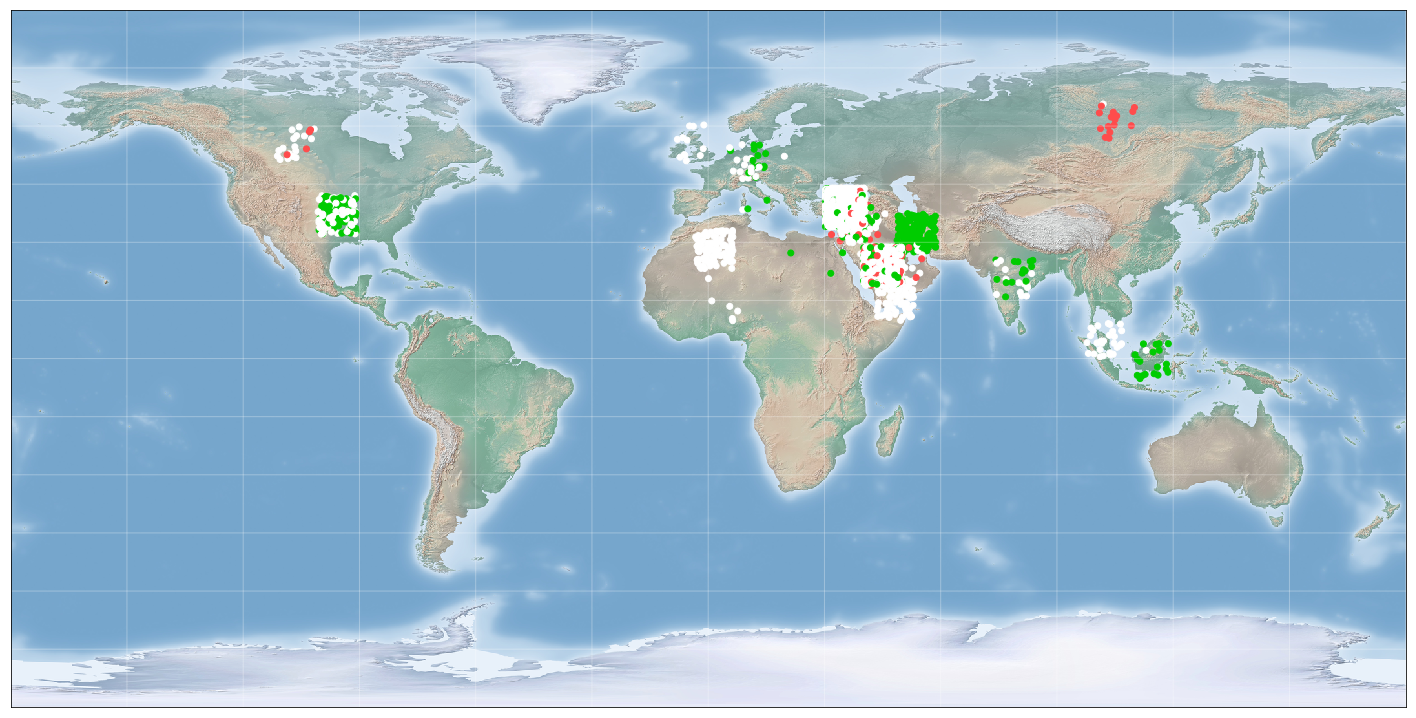

In [22]:
fig = plt.figure(figsize=(25,25))
m = Basemap(projection='cyl')
draw_map(m)

m.scatter(data_s4.iloc[:,-3],data_s4.iloc[:,-4],color=color_map4)
plt.savefig("worldmap_f1.pdf")

In [104]:
whole_text=''
l=[]
data_s["words"] = [TextBlob(x).noun_phrases for x in data_s["text"]]
data_s6 = data_s[(data_s["language"]!= "ar" )]
for d in data_s6["words"].values:
    l.append(' '.join([x for x in d]))
    
whole_text = ' '.join([x for x in l])

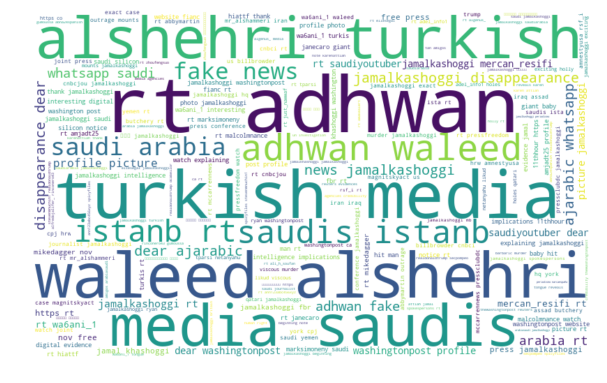

<Figure size 432x288 with 0 Axes>

In [105]:
wordcloud = WordCloud(width=800, height=500, max_font_size=110,background_color="white").generate(whole_text)
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
plt.savefig("first_wordcloud.png")

### SECOND DATA : 

Deuxième data sur #JamalKashoggi de 2018-10-22 (avant d'un jour du speech d'Erdogan) à 2018-10-27 :

à peu près 3000 lignes de tweet/retweet


In [2]:
data2 = pd.read_csv("JamalKashoggi3.csv")
data2 = data2.drop_duplicates("tweet_id")
data_s2 = data2[data2["retweeted_status"] != 0]
data_s2 = data_s2.sort_values("created_at",ascending=True)
data_s2["polarity"] = [TextBlob(x).sentiment.polarity for x in data_s2["text"]]
data_s2["subjectivity"] = [TextBlob(x).sentiment.subjectivity for x in data_s2["text"]]

In [3]:
data_s2.shape

(3999, 12)

In [70]:
h2 = nx.DiGraph()
l2 = []
color_map2 = []
stat = []
for d in data_s2.values:
    if (d[10] < -0.1):
        color_map2.append("#ff4c4c")
        stat.append("negative")
    elif (d[10] > 0.1):
        color_map2.append("#659D32")
        stat.append("positive")
    else:
        color_map2.append("#99CCFF")
        stat.append("neutral")
    #h2.add_node(d[7],attr_dict={'start' :d[0], 'end' : "2019-01-01 23:37:53"})
    #h2.add_node(d[0]) 
    l2.append((d[4],d[6]))
    
h2.add_edges_from(l2)
#pos=nx.spring_layout(h)
options2 = {
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
} 

In [71]:
data_s2["stat"] = stat

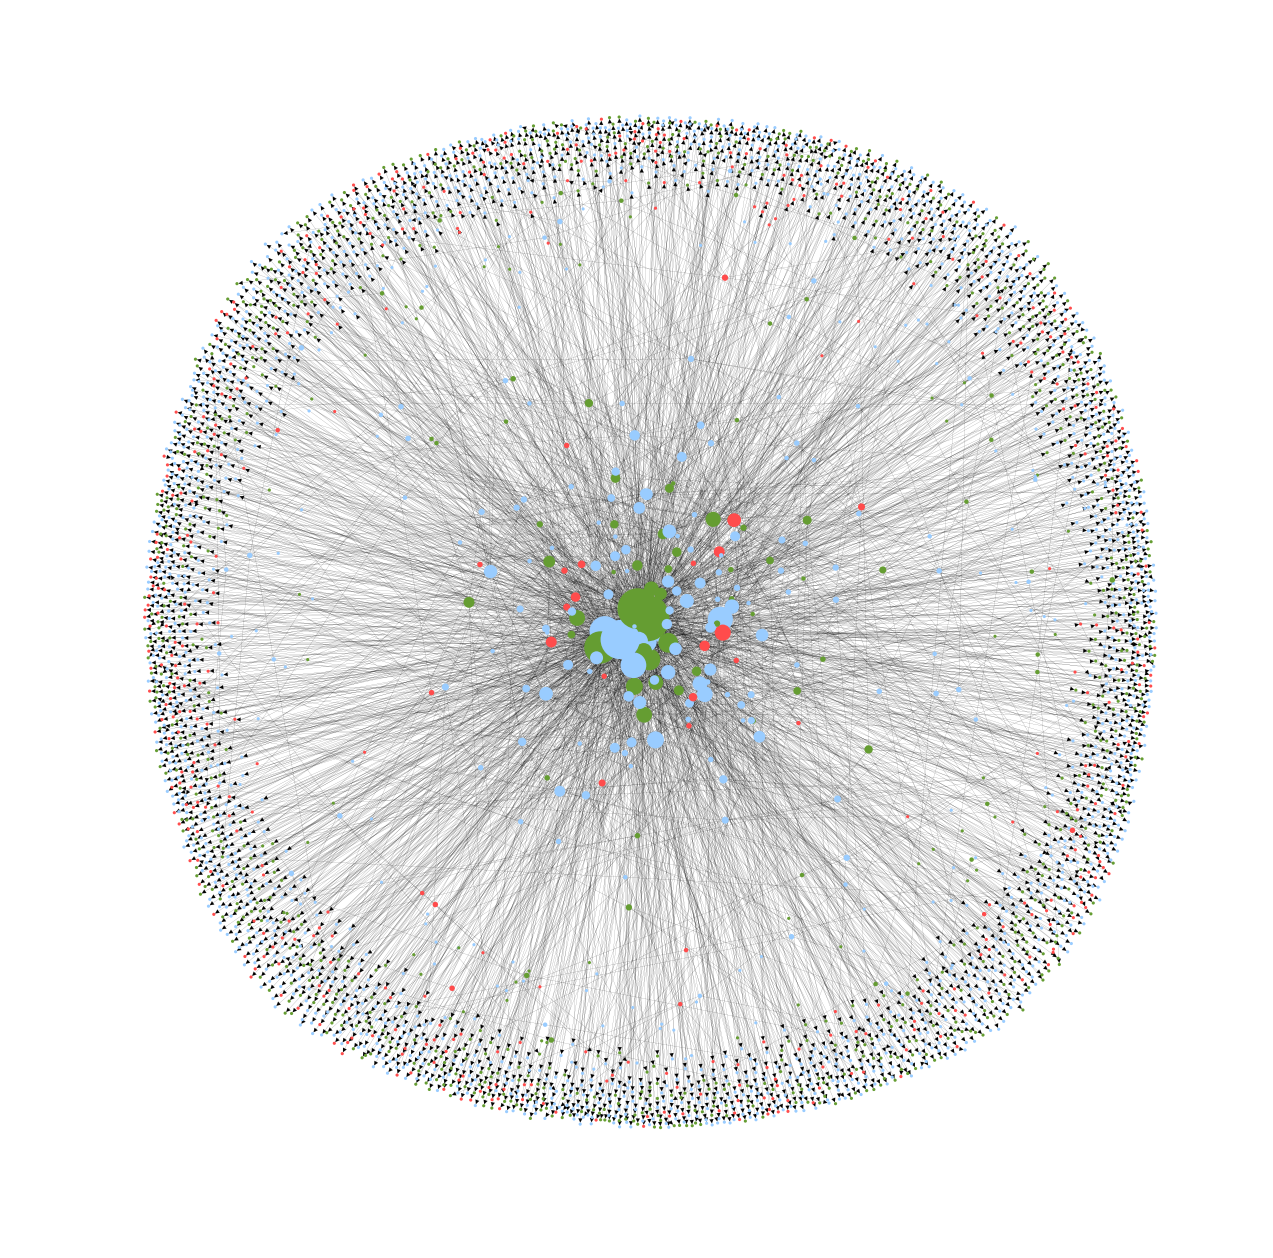

In [26]:
plt.figure(figsize=(17,17)) 
nx.draw(h2,**options2,node_color=color_map2,node_size=[v[1]*10 for v in nx.degree(h2)])
#nx.draw_spring(h,**options)
#plt.show()
plt.savefig("graph_f3.png", dpi=1000)
plt.savefig("graph_f3.pdf") 

- La taille des noeuds est relative a leurs nombres de retweets
- La couleur du noeud indique s'il est neutre (bleu) , positif (vert) ou négatif (rouge)

In [52]:
print(nx.info(h2))

Name: 
Type: DiGraph
Number of nodes: 3484
Number of edges: 3000
Average in degree:   0.8611
Average out degree:   0.8611


#### Density : 

In [29]:
nx.density(h2)

0.0002472234336170469

#### Comparaison du nombres des tweets Neutre , Negatif et Positifs : 

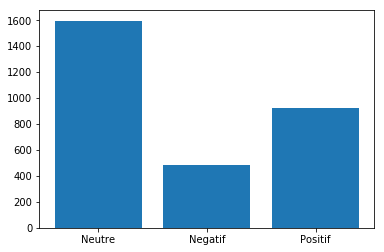

In [70]:
plt.bar(["Neutre","Negatif","Positif"],[color_map2.count("#99CCFF"),color_map2.count("#ff4c4c"),color_map2.count("#659D32")])
plt.savefig("plot_f2.png")

#### Betweenness centrality : 

In [31]:
bc = nx.betweenness_centrality(h2)

In [59]:
#[[key,value] for key, value in bc.items() ][:5]
key = [key for key, value in bc.items() ]
value = [value for key, value in bc.items() ]
bc_data = pd.DataFrame({"key":key,"value":value})
bc_data.join(data_s2, lsuffix='key', rsuffix='tweet_id')[["key","username","value"]].iloc[1:3]

key         username  value
1  1052672016589963273  Steven Charlton    0.0
2  1052650967781408768       NoneYa.biz    0.0

#### In and out degrees : 

In [33]:
in_d = h2.in_degree()

In [97]:
out_d = h2.out_degree()
[[key,value] for key, value in out_d ][:5]
key = [key for key, value in out_d ]
value = [value for key, value in out_d ]
out_data = pd.DataFrame({"key":key,"value":value})
out_data.join(data_s2, lsuffix='key', rsuffix='tweet_id')[["key","username","value"]].sort_values(by="value",ascending=False).iloc[3:6]

key     username  value
3188  1055531976050925568          NaN    154
2001  1054898869635633152          NaN    104
507   1054676865649164288  Susan Stone     95

In [101]:
data_s2.join(out_data, rsuffix='tweet_id',lsuffix='key')[["username","value","text","polarity"]].sort_values(by="value",ascending=False).head(10)

username  value  \
2                  NoneYa.biz  999.0   
963                   Amir Gd  200.0   
507               Susan Stone   95.0   
809           Diana's 2 Sense   78.0   
515             Woke in OH 🇺🇸   63.0   
9                   Toussaint   53.0   
13         Yeniahval Gazetesi   47.0   
450   Daniel Lambert Lippy!!🌊   47.0   
1171       Muhammet Ali Bebek   39.0   
777     🎃S҉ca҉r҉e҉y҉G҉a҉m҉p҉🎃   29.0   

                                                   text  polarity  
2     RT @BitarSaif: TOXIC BEYOND TOXICITY \r\r\n❝I ...      0.00  
963   @BahmanKalbasi @LeonEoW Well said #JamalKashog...      0.00  
507   RT @lauferlaw: Prunes not working? Sad. Everyt...     -0.50  
809   RT @DawnCuny: @IvankaTrump #JamalKashoggi's fi...      0.45  
515   RT @lauferlaw: Prunes not working? Sad. Everyt...     -0.50  
9     RT @BitarSaif: TOXIC BEYOND TOXICITY \r\r\n❝I ...      0.00  
13    The Independent gazetesinin Bağımsız Yayın Çiz...      0.00  
450   RT @lauferlaw: Prunes not working? Sad. Everyt...     -0.50  
1171  RT @BMoon_bee: [BREAKING] 🔴 Gina Haspel, Direc...     -0.75  
777   RT @DawnCuny: @IvankaTrump #JamalKashoggi's fi...      0.45

In [104]:
data_s2.join(out_data, rsuffix='tweet_id',lsuffix='key')[["username","value","text","polarity"]].sort_values(by="value",ascending=False)["text"].iloc[3]

"RT @DawnCuny: @IvankaTrump #JamalKashoggi's fiancé wishes she would be celebrating an anniversary with her light, her love, and her life, b…"

#### Diameter : 

In [35]:
#nx.diameter(h2)    Found infinite path length because the digraph is not strongly connected

In [36]:
#nx.draw(nx.stochastic_graph(h2))

#### Reciprocity : 

In [37]:
nx.algorithms.reciprocity(h2)

0.0

#### Closeness centrality : 

In [69]:
cc = nx.closeness_centrality(h2)
key = [key for key, value in cc.items() ]
value = [value for key, value in cc.items() ]
cc_data = pd.DataFrame({"key":key,"value":value})
cc_data.join(data_s2, lsuffix='key', rsuffix='tweet_id')[["key","username","value"]].iloc[1:3]

key         username     value
1  1054517226408239104  Steven Charlton  0.000287
2  1054519744454426624       NoneYa.biz  0.000287

#### Community detection : 

In [39]:
communities = community.girvan_newman(h2)
coms = next(communities)

In [40]:
len(coms)

485

In [41]:
#nx.spring_layout(h2,k=.12)

In [42]:
"""data_s2 = data_s2.sort_values(by="created_at")
data_s2["order"] = [str(i)+",5500" for i in range(2000,2000+len(data_s2))]
data_s2["retweeted_status"] = data_s2["retweeted_status"].astype(str)
data_s2["tweet_id"] = data_s2["tweet_id"].astype(str)
data_s2.to_excel("JamalKashoggi3_forgephi.xlsx",index=False)"""

'data_s2 = data_s2.sort_values(by="created_at")\ndata_s2["order"] = [str(i)+",5500" for i in range(2000,2000+len(data_s2))]\ndata_s2["retweeted_status"] = data_s2["retweeted_status"].astype(str)\ndata_s2["tweet_id"] = data_s2["tweet_id"].astype(str)\ndata_s2.to_excel("JamalKashoggi3_forgephi.xlsx",index=False)'

In [43]:
#nx.write_gexf(h2, "test.gexf")

In [80]:
data2 = pd.read_csv("JamalKashoggi3.csv")
data2 = data2.drop_duplicates("tweet_id")
data_s2 = data2[data2["retweeted_status"] != 0]
data_s2 = data_s2.sort_values("created_at",ascending=True)
data_s2["polarity"] = [TextBlob(x).sentiment.polarity for x in data_s2["text"]]
data_s2["subjectivity"] = [TextBlob(x).sentiment.subjectivity for x in data_s2["text"]]

In [82]:
data_s2["userlocation"] = data_s2["userlocation"].fillna(" ")

In [83]:
data_s2[["username","userlocation"]].head(10)

username           userlocation
5997         محمد الفريدان  منفذ البطحاء الحدودي 
5995          فيصل الشاطري                       
5993              ❌Linda P                       
5991               Scarlet         Rio Rancho, NM
5990                🌺jess🌺                    USA
5989      Sevag Kechichian                       
5988   Henrik #FreeAssange                  Earth
5986  LigiaLópezDeCastilla   Perú, Iberoamérica. 
5985        Deborah Hurley                       
5984                  Tony            New Zealand

In [84]:
data_s2.columns

Index(['created_at', 'favorite_count ', 'language', 'retweet_count',
       'retweeted_status', 'text', 'tweet_id', 'user_id', 'userlocation',
       'username', 'polarity', 'subjectivity'],
      dtype='object')

In [85]:
places = []
for i in data_s2.values:
    places.append(GeoText(i[8]))
pl = []
for i in places:
    pl.append(list(i.country_mentions.items()))

for i in range(len(pl)):
    if(pl[i] != []):
        pl[i] = pl[i][0][0]
    else:
        pl[i] = np.nan
        
data_s2["location"] = pl


In [92]:
data_s2[["username","userlocation","location"]].iloc[20:30]

username                    userlocation location
5969       ابو خالد MBS                                      NaN
5968     Andrew Connell  London/Wirral/Europe somewhere       GB
5967     Frank Florianz           Wilkes-Barre, PA  USA       US
5966  Vote November 6th                                      NaN
5965  Vote November 6th                  Pennsauken, NJ       US
5964              Katie                       Baltimore       US
5963    Lisa Stolarczyk                 New Mexico, USA      NaN
5962      Claire Denman                Hampshire/London       GB
5960              Satan                        Mercury       NaN
5959    retali8 🤘🇺🇸 😈🌊🌀                      Texas, USA       US

In [101]:
data_s2.groupby("location").count().sort_values(by="created_at",ascending=False).head(n=10)

created_at  favorite_count   language  retweet_count  \
location                                                         
US               431              431       431            431   
GB                89               89        89             89   
PK                81               81        81             81   
FR                63               63        63             63   
CA                55               55        55             55   
IN                50               50        50             50   
SA                40               40        40             40   
CL                38               38        38             38   
ZA                19               19        19             19   
LK                18               18        18             18   

          retweeted_status  text  tweet_id  user_id  userlocation  username  \
location                                                                      
US                     431   431       431      431           431       431   
GB                      89    89        89       89            89        89   
PK                      81    81        81       81            81        81   
FR                      63    63        63       63            63        63   
CA                      55    55        55       55            55        55   
IN                      50    50        50       50            50        50   
SA                      40    40        40       40            40        40   
CL                      38    38        38       38            38        38   
ZA                      19    19        19       19            19        19   
LK                      18    18        18       18            18        18   

          polarity  subjectivity  
location                          
US             431           431  
GB              89            89  
PK              81            81  
FR              63            63  
CA              55            55  
IN              50            50  
SA              40            40  
CL              38            38  
ZA              19            19  
LK              18            18

In [102]:
#data_s2.groupby("location")["polarity"].mean()

In [103]:
data_s2.columns

Index(['created_at', 'favorite_count ', 'language', 'retweet_count',
       'retweeted_status', 'text', 'tweet_id', 'user_id', 'userlocation',
       'username', 'polarity', 'subjectivity', 'location'],
      dtype='object')

In [95]:
lat = []
lng = []
lat_lng=[]
countries_names=[]
countries = pd.read_csv("countries.csv")
countries.head()
for d in data_s2.values:
    if (d[12] is not np.nan):
        lat.append(float(countries[countries["country"] == d[12]]["latitude"]))
        lng.append(float(countries[countries["country"] == d[12]]["longitude"]))
        lat_lng.append((float(countries[countries["country"] == d[12]]["latitude"]),float(countries[countries["country"] == d[12]]["longitude"])))
        countries_names.append(countries[countries["country"] == d[12]]["name"].iloc[0])
    else :
        lat.append(0)
        lng.append(0)
        countries_names.append(0)
        lat_lng.append((0,0))
data_s2["lat"] = lat
data_s2["lng"] = lng
data_s2["lat_lng"]=lat_lng
data_s2["country_name"] = countries_names

In [96]:
data_s3 = data_s2[data_s2["lat_lng"]!=(0,0)]
data_s3.shape

(1166, 17)

In [97]:
data_s3[["username","location","lat","lng"]].iloc[20:30]

username location        lat        lng
5917          Greg Barton       US  37.090240 -95.712891
5916   🇺🇸 Thomas Simon 🇺🇸       US  37.090240 -95.712891
5912    Häzael Holzheimer       CH  46.818188   8.227512
5911         Barry Mullin       US  37.090240 -95.712891
5910         Barry Mullin       US  37.090240 -95.712891
5905                 crum       US  37.090240 -95.712891
5900  Dil Nawaz Awan Pmln       PK  30.375321  69.345116
5898      Mian Zia Ul Haq       PK  30.375321  69.345116
5897               Shahil       IN  20.593684  78.962880
5893        Deepak Bindal       IN  20.593684  78.962880

In [106]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [107]:
from mpl_toolkits.basemap import Basemap
import random
data_s3.iloc[:,-3]= [x+random.uniform(-3,3) for x in data_s3.iloc[:,-3]]
data_s3.iloc[:,-4] = [x+random.uniform(-3,3) for x in data_s3.iloc[:,-4]]

C:\Users\Justpro\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [108]:
data_s3.columns

Index(['created_at', 'favorite_count ', 'language', 'retweet_count',
       'retweeted_status', 'text', 'tweet_id', 'user_id', 'userlocation',
       'username', 'polarity', 'subjectivity', 'location', 'lat', 'lng',
       'lat_lng', 'country_name'],
      dtype='object')

In [109]:
l3 = []
color_map3 = []
for d in data_s3.values:
    if (d[10] < -0.1):
        color_map3.append("#ff4c4c")
    elif (d[10] > 0.1):
        l3.append(d[5])
        color_map3.append("#00cc00")
    else:
        color_map3.append("#ffffff")

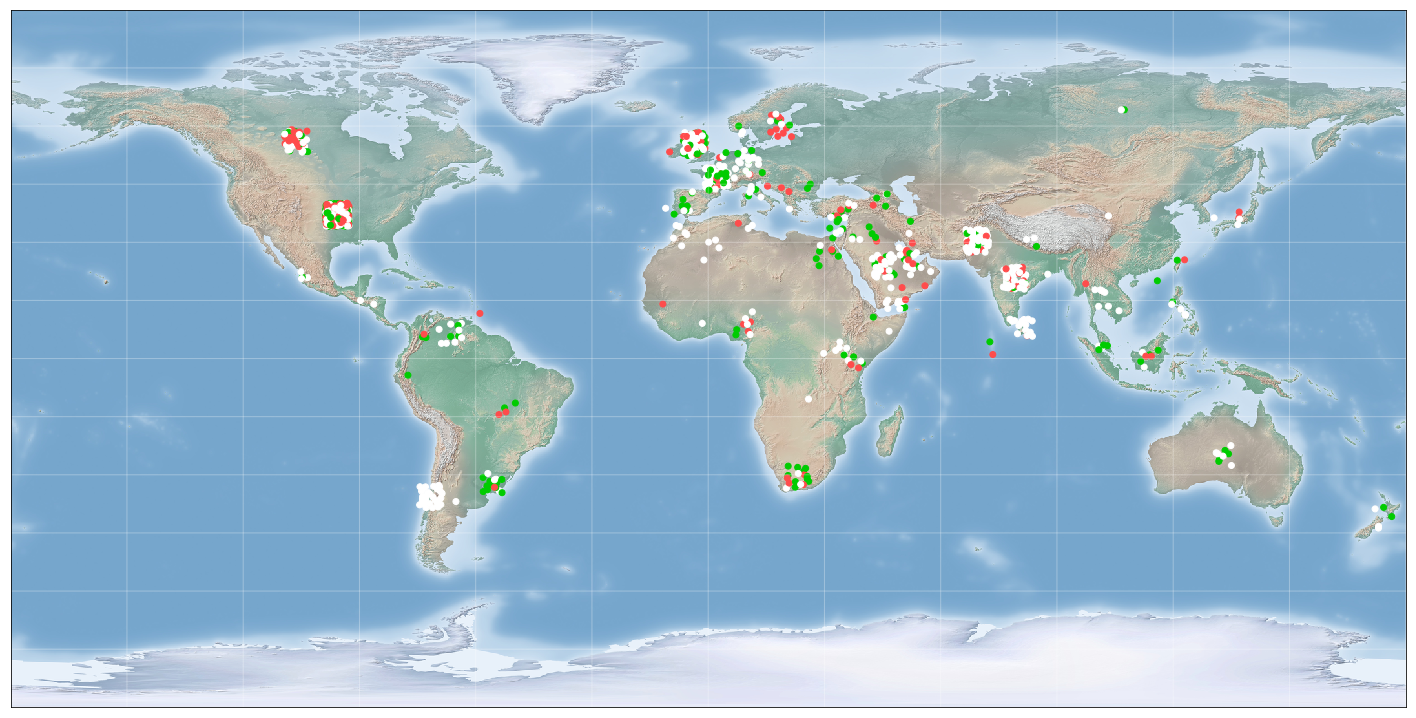

In [110]:
fig = plt.figure(figsize=(25,25))
m = Basemap(projection='cyl')
draw_map(m)

m.scatter(data_s3.iloc[:,-3],data_s3.iloc[:,-4],color=color_map3)
plt.savefig("worldmap_f2.pdf")

In [77]:
data_s2.columns

Index(['created_at', 'favorite_count ', 'language', 'retweet_count',
       'retweeted_status', 'text', 'tweet_id', 'user_id', 'userlocation',
       'username', 'polarity', 'subjectivity', 'words', 'stat'],
      dtype='object')

In [78]:
negative_text=''
positive_text=''
neutral_text=''
l=[]
data_s2["words"] = [TextBlob(x).noun_phrases for x in data_s2["text"]]
data_s5 = data_s2[(data_s2["language"]!= "ar" )]
for d in data_s5[data_s5["stat"]=="negative"]["words"].values:
    l.append(' '.join([x for x in d]))
    
negative_text = ' '.join([x for x in l])
l=[]

for d in data_s5[data_s5["stat"]=="positive"]["words"].values:
    l.append(' '.join([x for x in d]))
    
positive_text = ' '.join([x for x in l])
l=[]

for d in data_s5[data_s5["stat"]=="neutral"]["words"].values:
    l.append(' '.join([x for x in d]))
    
neutral_text = ' '.join([x for x in l])

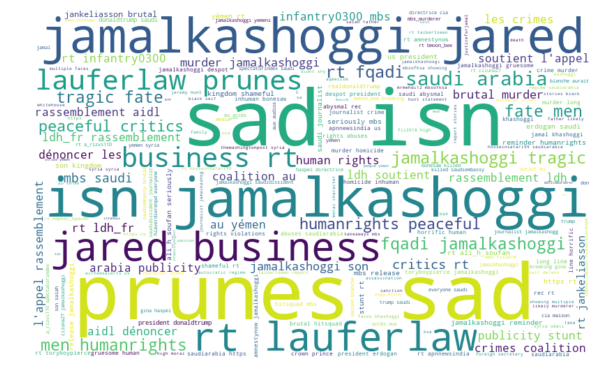

<Figure size 432x288 with 0 Axes>

In [91]:
wordcloud = WordCloud(width=800, height=500, max_font_size=110,background_color="white").generate(negative_text)
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
plt.savefig("negative_wordcloud.png")

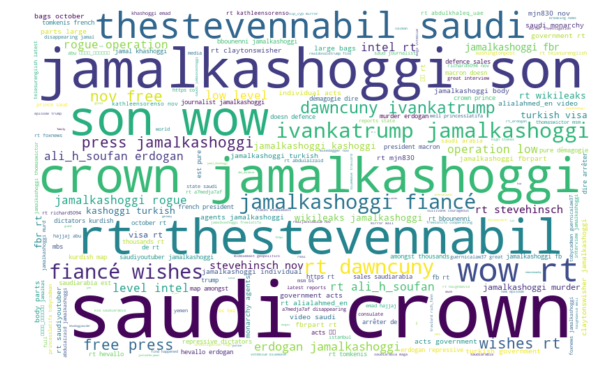

<Figure size 432x288 with 0 Axes>

In [90]:
wordcloud = WordCloud(width=800, height=500, max_font_size=110,background_color="white").generate(positive_text)
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
plt.savefig("positive_wordcloud.png")

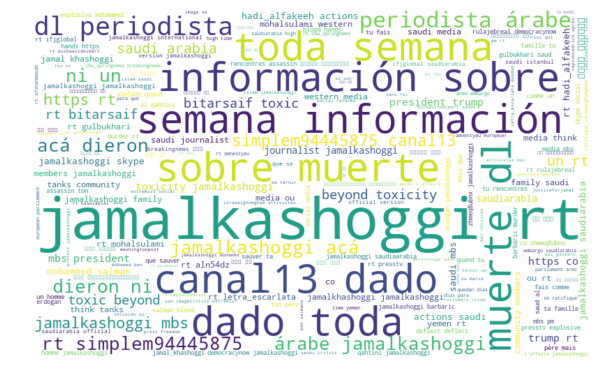

<Figure size 432x288 with 0 Axes>

In [89]:
wordcloud = WordCloud(width=800, height=500, max_font_size=110,background_color="white").generate(neutral_text)
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
plt.savefig("neutral_wordcloud.png")

# Youtube Link : 

https://youtu.be/TWEjIuWbzmU